In [1]:
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from numpy import array

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score


from joblib import parallel_backend
from joblib import Parallel, delayed
import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale

In [2]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


mfilename='/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/FR_DCL/FR_DCL_models/rfc_FR_dcl_comb_tr4_tetra_v1.pkl'
# load the model from disk
rfc_rpdcl_tr4 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [3]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


dclsr_df= pd.read_csv('/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/FR_DCL/pred/data/fr_dcl_pr_set4_tetra_df.txt',header=0,sep='\t')

print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(dclsr_df)
shuf_comb_df=dclsr_df.iloc[np.random.permutation(len(dclsr_df))]
shuf_comb_df=shuf_comb_df.reset_index(drop=True)
shuf_comb_df.info()

loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243038 entries, 0 to 1243037
Columns: 262 entries, seq_id to TTTT
dtypes: int64(261), object(1)
memory usage: 2.4+ GB


In [4]:
ydt=shuf_comb_df['ptype']
xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)

In [5]:
with parallel_backend('threading',n_jobs=64 ):
    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # Predict the Test set results

    y_pred = rfc_rpdcl_tr4.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [6]:
from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))

print ("\nClassification report :\n",(classification_report(ydt,y_pred)))

prediction accuracy score : 0.7536

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.70      0.75    664137
           1       0.70      0.81      0.75    578901

    accuracy                           0.75   1243038
   macro avg       0.76      0.76      0.75   1243038
weighted avg       0.76      0.75      0.75   1243038



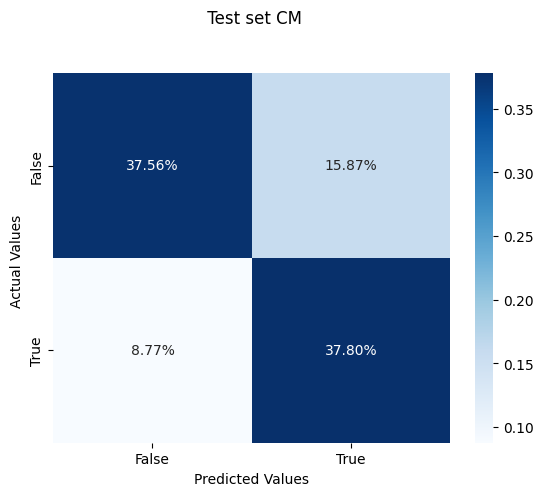

In [8]:
plt.rcParams.update({'font.size': 10})
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()
fig1.savefig('RF_frdcl_tr4_tetra_pred_set4.pdf', dpi=400)